### Importing libraries

In [410]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn import preprocessing
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, fbeta_score


%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

In [353]:
df_train= pd.read_csv("aug_train.csv")
df_test=pd.read_csv("aug_test.csv")
df= pd.concat([df_train,df_test], axis=0)
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15,NaN
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30,NaN
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18,NaN
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84,NaN


In [354]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21287 entries, 0 to 2128
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             21287 non-null  int64  
 1   city                    21287 non-null  object 
 2   city_development_index  21287 non-null  float64
 3   gender                  16271 non-null  object 
 4   relevent_experience     21287 non-null  object 
 5   enrolled_university     20870 non-null  object 
 6   education_level         20775 non-null  object 
 7   major_discipline        18162 non-null  object 
 8   experience              21217 non-null  object 
 9   company_size            14727 non-null  object 
 10  company_type            14513 non-null  object 
 11  last_new_job            20824 non-null  object 
 12  training_hours          21287 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
mem

,enrollee_id,city_development_index,training_hours,target
count,21287.000000,21287.000000,21287.000000,19158.000000
mean,16873.983652,0.828462,65.328510,0.249348
std,9612.131237,0.123537,60.075201,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.500000,0.739000,23.000000,0.000000
50%,16967.000000,0.903000,47.000000,0.000000
75%,25161.500000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [355]:
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    5016
relevent_experience          0
enrolled_university        417
education_level            512
major_discipline          3125
experience                  70
company_size              6560
company_type              6774
last_new_job               463
training_hours               0
target                    2129
dtype: int64

### Replacing NaN with simple imputer using the most frequent method as features are mostly categorical

In [356]:
imputer= SimpleImputer(strategy='most_frequent')
df['gender'] = imputer.fit_transform(df[['gender']])
df['enrolled_university'] = imputer.fit_transform(df[['enrolled_university']])
df['education_level'] = imputer.fit_transform(df[['education_level']])
df['major_discipline'] = imputer.fit_transform(df[['major_discipline']])
df['experience'] = imputer.fit_transform(df[['experience']])
df['company_size'] = imputer.fit_transform(df[['company_size']])
df['company_type'] = imputer.fit_transform(df[['company_type']])
df['last_new_job'] = imputer.fit_transform(df[['last_new_job']])

In [357]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21287 entries, 0 to 2128
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             21287 non-null  int64  
 1   city                    21287 non-null  object 
 2   city_development_index  21287 non-null  float64
 3   gender                  21287 non-null  object 
 4   relevent_experience     21287 non-null  object 
 5   enrolled_university     21287 non-null  object 
 6   education_level         21287 non-null  object 
 7   major_discipline        21287 non-null  object 
 8   experience              21287 non-null  object 
 9   company_size            21287 non-null  object 
 10  company_type            21287 non-null  object 
 11  last_new_job            21287 non-null  object 
 12  training_hours          21287 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
mem

enrollee_id                  0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline             0
experience                   0
company_size                 0
company_type                 0
last_new_job                 0
training_hours               0
target                    2129
dtype: int64

### Dropping ID & city ID column as it's not necessary feature for now

In [358]:
df.drop('enrollee_id', axis=1, inplace=True)
df.drop('city', axis=1, inplace=True)

In [359]:
df

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0
3,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1.0
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2124,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,50-99,Public Sector,4,15,NaN
2125,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,50-99,Pvt Ltd,2,30,NaN
2126,0.887,Male,No relevent experience,no_enrollment,Primary School,STEM,3,50-99,Pvt Ltd,never,18,NaN
2127,0.804,Male,Has relevent experience,Full time course,High School,STEM,7,100-500,Public Sector,1,84,NaN


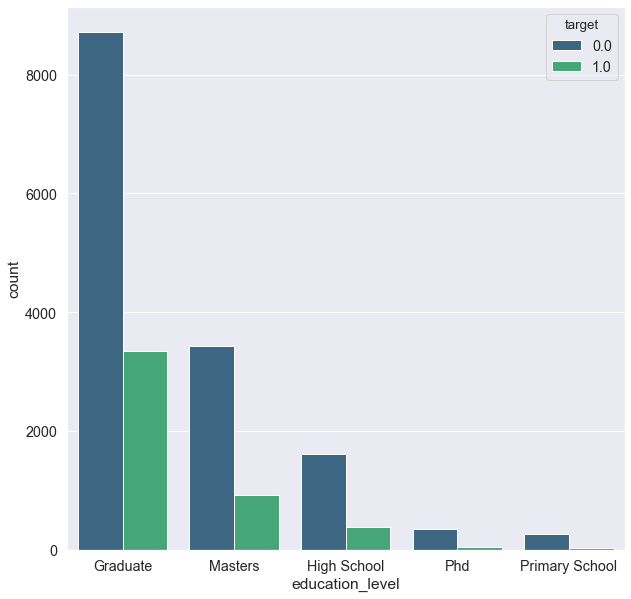

In [360]:
sns.countplot(x='education_level',hue='target', data=df, palette='viridis')


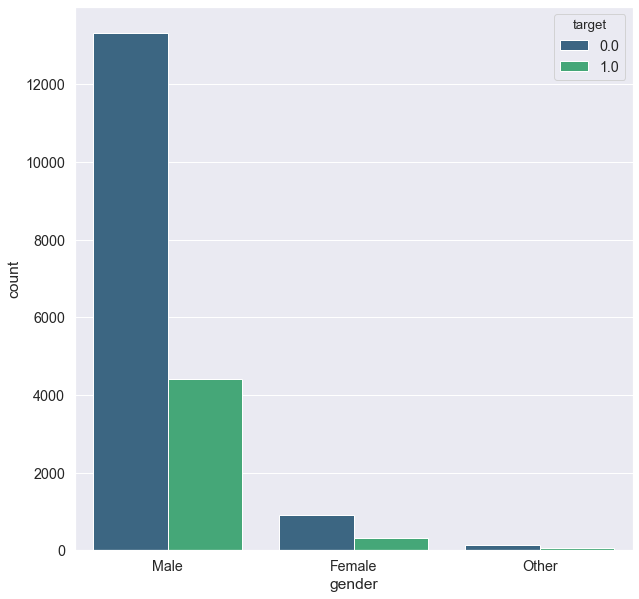

In [361]:
sns.countplot(x='gender',hue='target', data=df, palette='viridis')


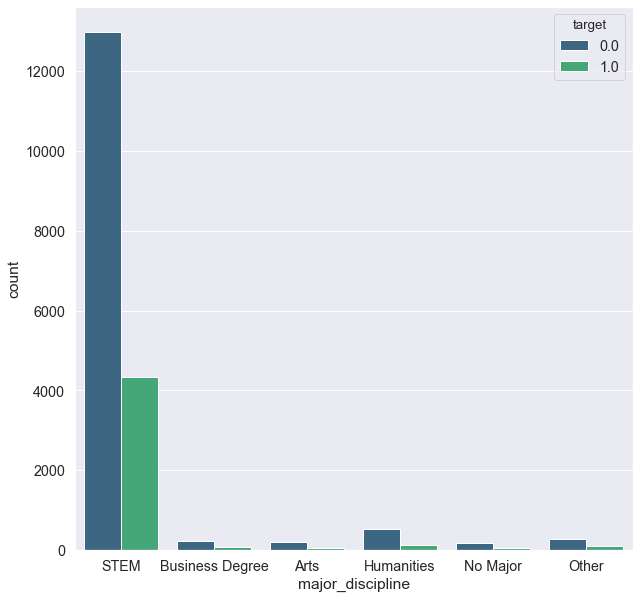

In [362]:
sns.countplot(x='major_discipline',hue='target', data=df, palette='viridis')

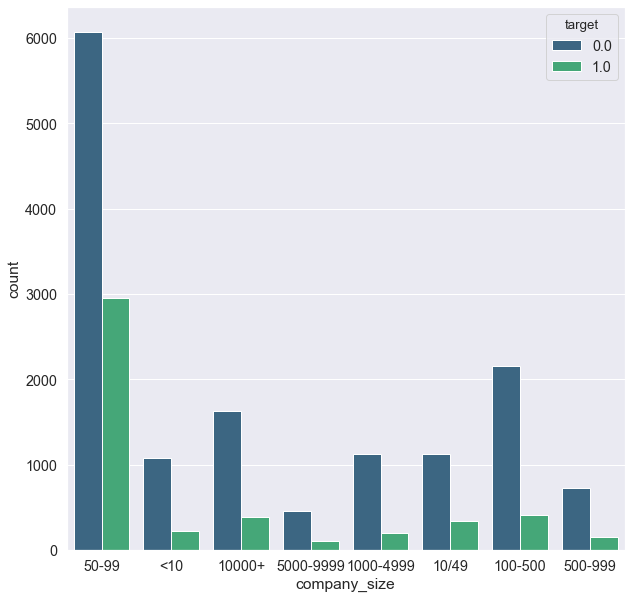

In [363]:
sns.countplot(x='company_size',hue='target', data=df, palette='viridis')


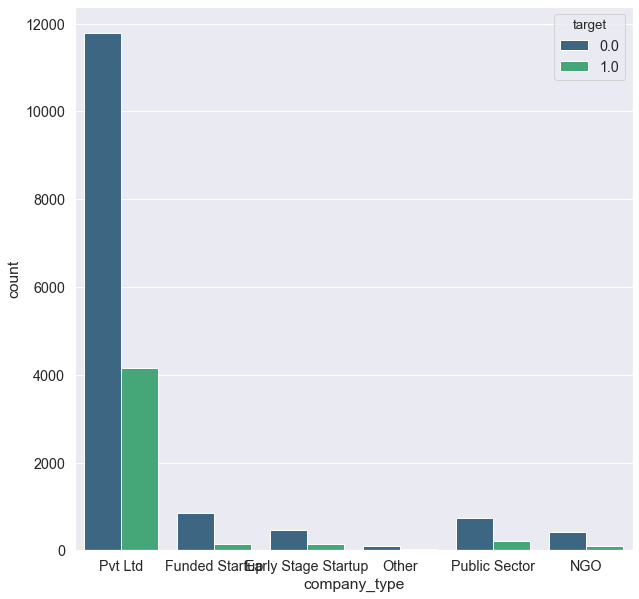

In [364]:
sns.countplot(x='company_type',hue='target', data=df, palette='viridis')

### From the above graphs it's noted that most of features are equally distributed

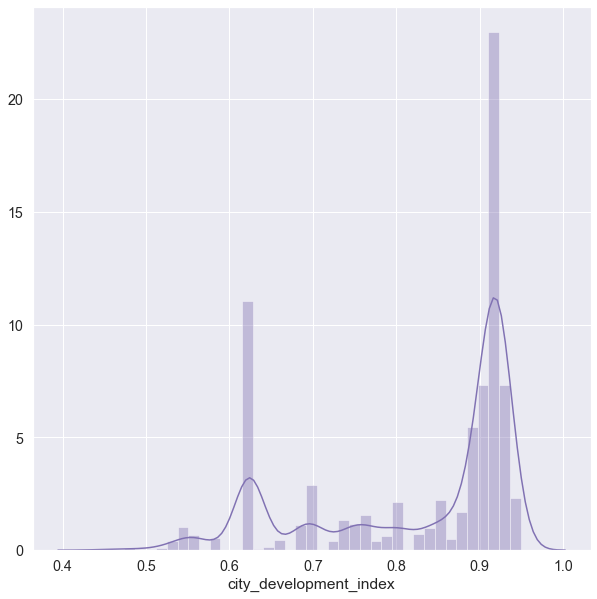

In [365]:
sns.distplot(df['city_development_index'], color='m')

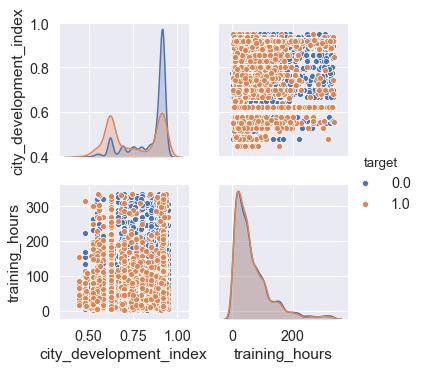

In [366]:
sns.pairplot(data=df, hue='target')

### Noted that High index city devlopment people are more likely not to look for job and the more training hours the more likey not looking for job too.

## Mapping categorical data into numerical

In [367]:

print(df['gender'].value_counts())
print(df['relevent_experience'].value_counts())
print(df['enrolled_university'].value_counts())
print(df['education_level'].value_counts())
print(df['major_discipline'].value_counts())
print(df['experience'].value_counts())
print(df['company_size'].value_counts())
print(df['company_type'].value_counts())
print(df['last_new_job'].value_counts())

Male      19697
Female     1375
Other       215
Name: gender, dtype: int64
Has relevent experience    15316
No relevent experience      5971
Name: relevent_experience, dtype: int64
no_enrollment       15753
Full time course     4192
Part time course     1342
Name: enrolled_university, dtype: int64
Graduate          13379
Masters            4857
High School        2239
Phd                 468
Primary School      344
Name: education_level, dtype: int64
STEM               19238
Humanities           749
Other                421
Business Degree      364
Arts                 270
No Major             245
Name: major_discipline, dtype: int64
>20    3739
5      1593
4      1548
3      1508
6      1346
2      1255
7      1144
9      1093
10     1081
8       884
11      750
15      745
14      641
1       605
<1      596
16      576
12      546
13      453
17      378
19      333
18      306
20      167
Name: experience, dtype: int64
50-99        9981
100-500      2889
10000+       2236
10/49    

In [368]:
df = pd.get_dummies(df, columns=['major_discipline', 'company_type' ], drop_first=True)

In [369]:
df

,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,>20,50-99,1,36,1.0,0,0,0,0,1,0,0,0,0,1
1,0.776,Male,No relevent experience,no_enrollment,Graduate,15,50-99,>4,47,0.0,0,0,0,0,1,0,0,0,0,1
2,0.624,Male,No relevent experience,Full time course,Graduate,5,50-99,never,83,0.0,0,0,0,0,1,0,0,0,0,1
3,0.789,Male,No relevent experience,no_enrollment,Graduate,<1,50-99,never,52,1.0,1,0,0,0,0,0,0,0,0,1
4,0.767,Male,Has relevent experience,no_enrollment,Masters,>20,50-99,4,8,0.0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,0.920,Male,No relevent experience,no_enrollment,Graduate,16,50-99,4,15,NaN,0,1,0,0,0,0,0,0,1,0
2125,0.897,Male,Has relevent experience,no_enrollment,Masters,18,50-99,2,30,NaN,0,0,0,0,1,0,0,0,0,1
2126,0.887,Male,No relevent experience,no_enrollment,Primary School,3,50-99,never,18,NaN,0,0,0,0,1,0,0,0,0,1
2127,0.804,Male,Has relevent experience,Full time course,High School,7,100-500,1,84,NaN,0,0,0,0,1,0,0,0,1,0


In [370]:
gender_mapped = {'Male':1,'Female':2,'Other':3}
rel_exp_mapped = {'Has relevent experience':1,'No relevent experience':2}
enrolled_university_mapped = {'no_enrollment':1,'Part time course':2,'Full time course':3}
education_level_mapped = {'Primary School':1,'High School':2,'Graduate':3,'Masters':4,'Phd':5}
experience_mapped = {'<1':0,'>20':21, 
'5':5,
'4':4,
'3':3,
'6':6,
'2':2,
'7':7,
'10':10,
'9':9,
'8':8,
'15':15,
'11':11,
'14':14,
'1':1,
'<1':0,
'16':16,
'12':12,
'13':13,
'17':17,
'19':19,
'18':18,
'20':20,                     
}
company_size_mapped = {'<10':1,'10/49':2,'50-99':3,'100-500':4,'500-999':5,'1000-4999':6,'5000-9999':7,'10000+':8}
last_job_mapped = {'never':0,'1':1,'2':2,'3':3,'4':4,'>4':5}

In [371]:
df['gender'] = df['gender'].map(gender_mapped)
df['relevent_experience'] = df['relevent_experience'].map(rel_exp_mapped)
df['enrolled_university'] = df['enrolled_university'].map(enrolled_university_mapped)
df['education_level'] = df['education_level'].map(education_level_mapped)
df['experience'] = df['experience'].map(experience_mapped)
df['company_size'] = df['company_size'].map(company_size_mapped)
df['last_new_job'] = df['last_new_job'].map(last_job_mapped)


In [372]:
print(df['gender'].value_counts())
print(df['relevent_experience'].value_counts())
print(df['enrolled_university'].value_counts())
print(df['education_level'].value_counts())
print(df['experience'].value_counts())
print(df['company_size'].value_counts())
print(df['last_new_job'].value_counts())

1    19697
2     1375
3      215
Name: gender, dtype: int64
1    15316
2     5971
Name: relevent_experience, dtype: int64
1    15753
3     4192
2     1342
Name: enrolled_university, dtype: int64
3    13379
4     4857
2     2239
5      468
1      344
Name: education_level, dtype: int64
21    3739
5     1593
4     1548
3     1508
6     1346
2     1255
7     1144
9     1093
10    1081
8      884
11     750
15     745
14     641
1      605
0      596
16     576
12     546
13     453
17     378
19     333
18     306
20     167
Name: experience, dtype: int64
3    9981
4    2889
8    2236
2    1643
6    1471
1    1471
5     965
7     631
Name: company_size, dtype: int64
1    9387
5    3643
2    3242
0    2710
3    1157
4    1148
Name: last_new_job, dtype: int64


In [373]:
df

,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.920,1,1,1,3,21,3,1,36,1.0,0,0,0,0,1,0,0,0,0,1
1,0.776,1,2,1,3,15,3,5,47,0.0,0,0,0,0,1,0,0,0,0,1
2,0.624,1,2,3,3,5,3,0,83,0.0,0,0,0,0,1,0,0,0,0,1
3,0.789,1,2,1,3,0,3,0,52,1.0,1,0,0,0,0,0,0,0,0,1
4,0.767,1,1,1,4,21,3,4,8,0.0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,0.920,1,2,1,3,16,3,4,15,NaN,0,1,0,0,0,0,0,0,1,0
2125,0.897,1,1,1,4,18,3,2,30,NaN,0,0,0,0,1,0,0,0,0,1
2126,0.887,1,2,1,1,3,3,0,18,NaN,0,0,0,0,1,0,0,0,0,1
2127,0.804,1,1,3,2,7,4,1,84,NaN,0,0,0,0,1,0,0,0,1,0


In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21287 entries, 0 to 2128
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   city_development_index            21287 non-null  float64
 1   gender                            21287 non-null  int64  
 2   relevent_experience               21287 non-null  int64  
 3   enrolled_university               21287 non-null  int64  
 4   education_level                   21287 non-null  int64  
 5   experience                        21287 non-null  int64  
 6   company_size                      21287 non-null  int64  
 7   last_new_job                      21287 non-null  int64  
 8   training_hours                    21287 non-null  int64  
 9   target                            19158 non-null  float64
 10  major_discipline_Business Degree  21287 non-null  uint8  
 11  major_discipline_Humanities       21287 non-null  uint8  
 12  major

### Finding features correlations

In [375]:
corr = df.corr()

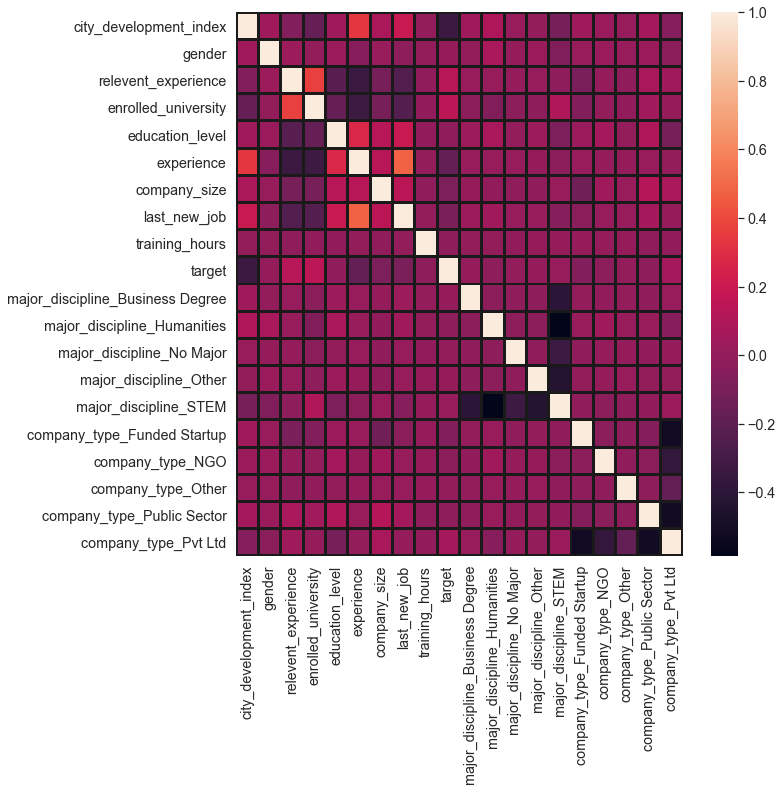

In [376]:
sns.heatmap(corr,linecolor='k', linewidths=2)

#### there are some correlations of target with city development index, enrolled university, experience and relevent experience

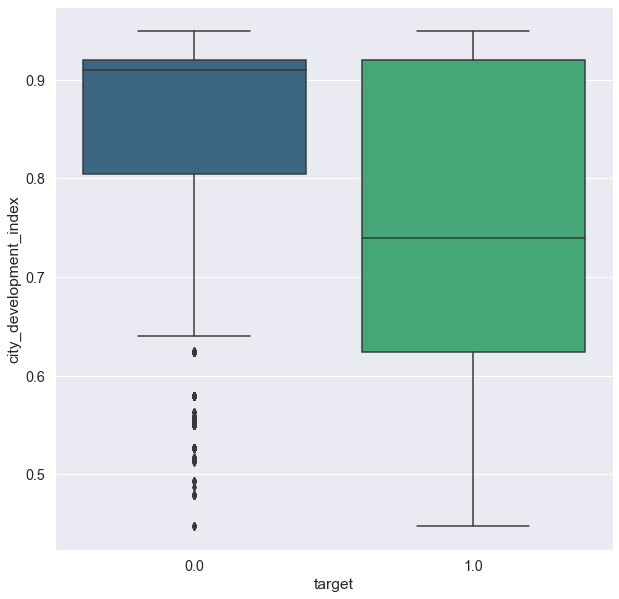

In [377]:
sns.boxplot(x='target', y='city_development_index', data=df, palette='viridis')


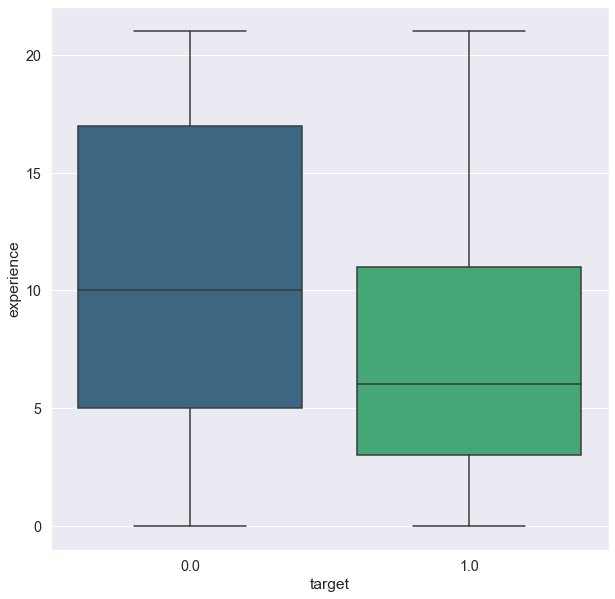

In [378]:
sns.boxplot(x='target', y='experience', data=df, palette='viridis')

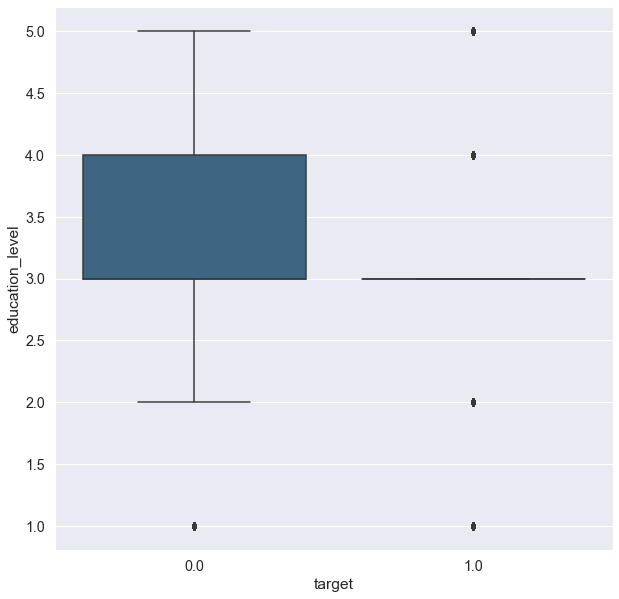

In [379]:
sns.boxplot(x='target', y='education_level', data=df, palette='viridis')

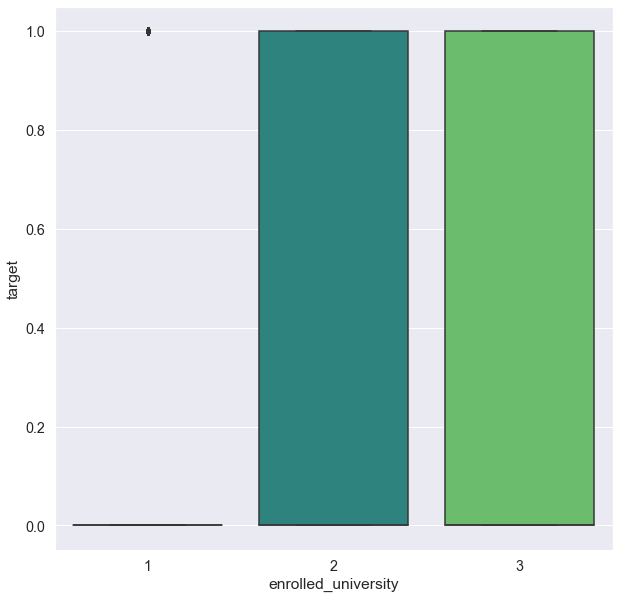

In [380]:
sns.boxplot(x='enrolled_university', y='target', data=df, palette='viridis')

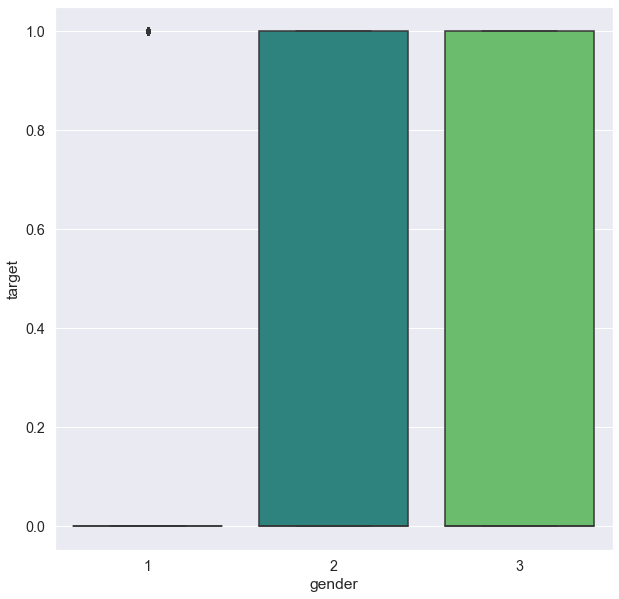

In [381]:
sns.boxplot(x='gender', y='target', data=df, palette='viridis')

### Exploring if targeted output classes are imbalanced

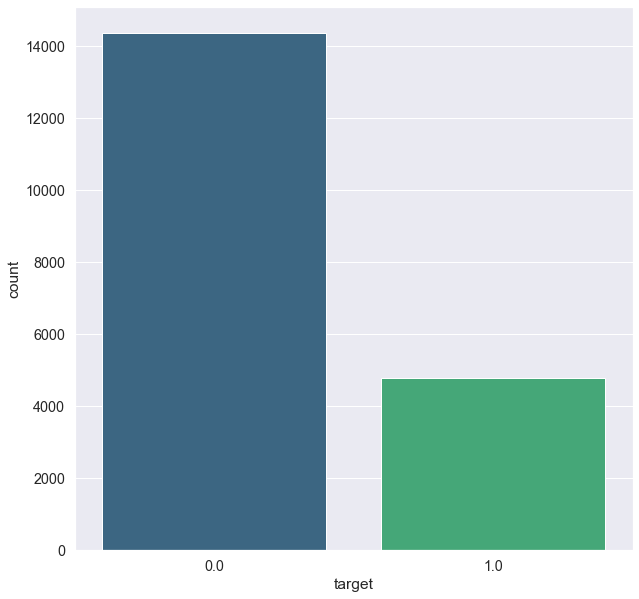

In [382]:
sns.countplot(x='target', data=df, palette='viridis')

#### -As we can see imbalanced classes are observed that would lead our model to be biased
#### -So, now we need to generate replicant records of people who are looking for job change the company by oversampling technique

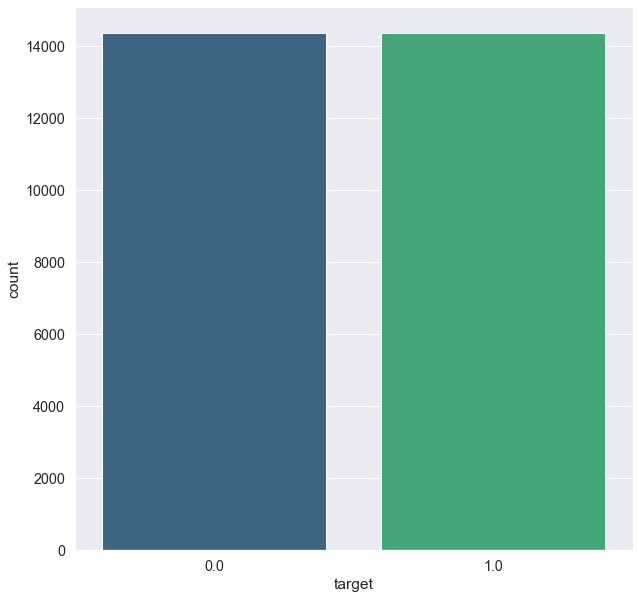

In [383]:
not_looking_for_job = df[df['target'] == 0]
looking_for_job = df[df['target'] == 1]
replicant_records = resample(looking_for_job, replace=True, n_samples=len(not_looking_for_job), random_state=43)
rep = pd.concat([not_looking_for_job, replicant_records])
rep['target'].value_counts()
sns.countplot(x='target', data=rep, palette='viridis')

#### let's see if there is outlier in training hours

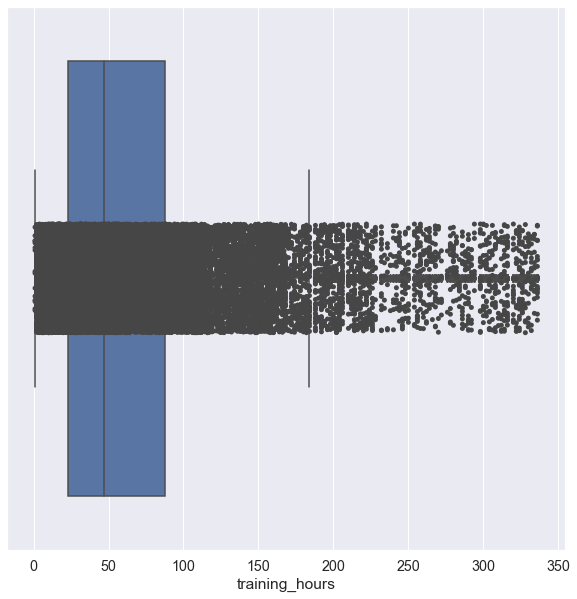

In [384]:
sns.boxplot(x='training_hours', data=rep)
sns.stripplot(x='training_hours', data=rep, color="#474646")


#### As we can see the density beyond IQR is almost as same as within the IQR, but still fall beyond the IQR so let's double check the distribution skewness and check with Zscore to make sure they are fall out from the threshold

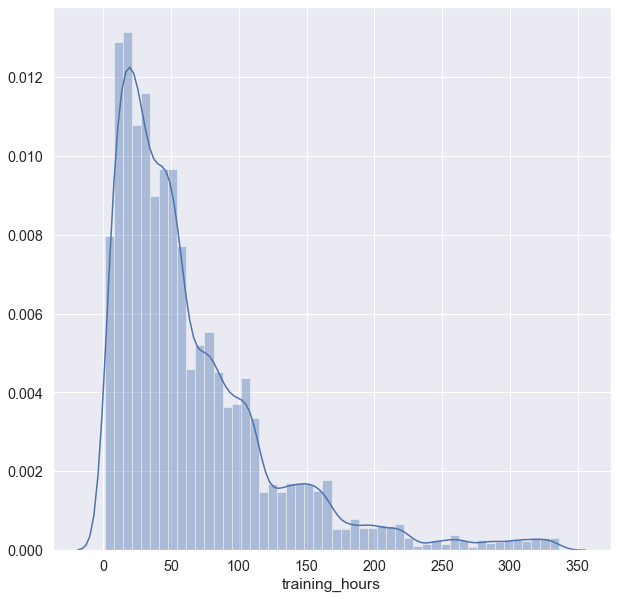

In [385]:
sns.distplot(rep['training_hours'])

#### As we can see our training hours data is not normally distributed, the skewed data represents about 2% of the whole data

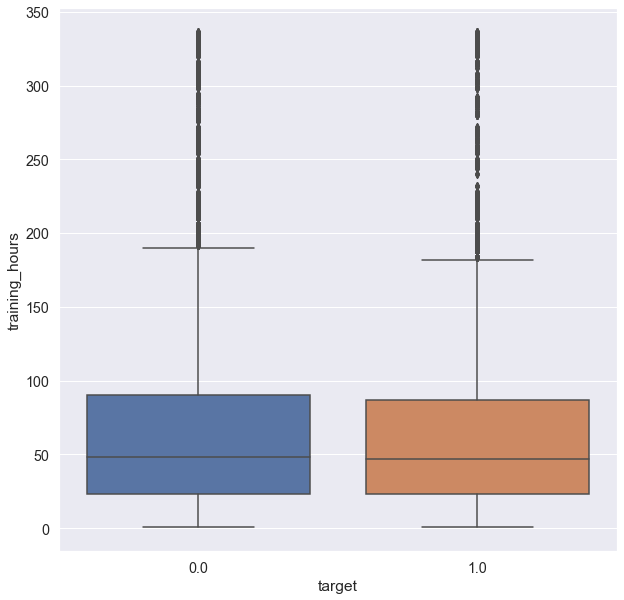

In [386]:
sns.boxplot(x="target", y="training_hours", data=rep)

In [387]:
rep.loc[np.abs(stats.zscore(rep['training_hours'])) < 3, 'training_hours']


1         47
2         83
4          8
6         24
9        123
        ... 
3877      10
2466      56
6759      62
17846    162
11341     92
Name: training_hours, Length: 28100, dtype: int64

In [388]:
rep.loc[np.abs(stats.zscore(rep['training_hours'])) > 3, 'training_hours']

89       332
119      260
133      290
161      326
176      246
        ... 
3166     332
5778     258
13505    308
6119     244
6765     268
Name: training_hours, Length: 662, dtype: int64

### Removing outliers

In [389]:
rep = rep[(np.abs(stats.zscore(rep)) < 3).all(axis=1)]
rep

,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
1,0.776,1,2,1,3,15,3,5,47,0.0,0,0,0,0,1,0,0,0,0,1
2,0.624,1,2,3,3,5,3,0,83,0.0,0,0,0,0,1,0,0,0,0,1
9,0.920,1,1,1,3,17,8,5,123,0.0,0,0,0,0,1,0,0,0,0,1
11,0.920,1,1,1,3,5,7,1,108,0.0,0,0,0,0,1,0,0,0,0,1
12,0.913,1,1,1,3,21,6,3,23,0.0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18260,0.910,1,2,3,3,3,3,1,69,1.0,0,0,0,0,1,0,0,0,0,1
3877,0.624,1,1,1,3,8,7,2,10,1.0,0,0,0,0,1,0,0,0,0,1
2466,0.624,1,1,1,3,5,8,1,56,1.0,0,0,0,0,1,0,0,0,0,1
6759,0.624,1,1,1,3,5,4,0,62,1.0,0,0,0,0,1,0,0,0,0,1


### Training Model

In [394]:
x = rep[['city_development_index', 'enrolled_university', 'experience', 'training_hours', 'relevent_experience','last_new_job']]
y = rep['target']


In [395]:
x

,city_development_index,enrolled_university,experience,training_hours,relevent_experience,last_new_job
1,0.776,1,15,47,2,5
2,0.624,3,5,83,2,0
9,0.920,1,17,123,1,5
11,0.920,1,5,108,1,1
12,0.913,1,21,23,1,3
...,...,...,...,...,...,...
18260,0.910,3,3,69,2,1
3877,0.624,1,8,10,1,2
2466,0.624,1,5,56,1,1
6759,0.624,1,5,62,1,0


In [396]:
y

1        0.0
2        0.0
9        0.0
11       0.0
12       0.0
        ... 
18260    1.0
3877     1.0
2466     1.0
6759     1.0
11341    1.0
Name: target, Length: 21778, dtype: float64

In [398]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=90)

In [399]:
model=LogisticRegression()

In [415]:
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [416]:
y_pred = model.predict(x_test)
y_pred

array([1., 1., 1., ..., 1., 0., 1.])

In [417]:
confusion_matrix(y_test, y_pred)

array([[1439,  655],
       [ 709, 1553]], dtype=int64)

In [418]:
precision_score(y_test, y_pred)

0.7033514492753623

In [419]:
accuracy_score(y_test, y_pred)

0.6868686868686869

In [420]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.69      0.68      2094
         1.0       0.70      0.69      0.69      2262

    accuracy                           0.69      4356
   macro avg       0.69      0.69      0.69      4356
weighted avg       0.69      0.69      0.69      4356



In [421]:
f1_score(y_test, y_pred)

0.6948545861297539

In [422]:
fbeta_score(y_test, y_pred, beta=0.5)

0.6999278889489815

In [423]:
fbeta_score(y_test, y_pred, beta=1)

0.6948545861297539